In [ ]:
#
#
#
#

In [126]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [86]:
rawdata = pd.read_csv("train.csv")
rawdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
S              891 non-null int64
C              891 non-null int64
Q              891 non-null int64
nan            891 non-null int64
Name Length    891 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 118.4+ KB


In [87]:
print(rawdata["SibSp"].unique())
print(rawdata["Parch"].unique())
print(rawdata["Fare"].max())
print(rawdata["Fare"].min())
print(rawdata["Age"].max())
print(rawdata["Age"].min())
print(rawdata["Pclass"].unique())
print(rawdata["Sex"].unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
512.3292
0.0
80.0
0.42
[3 1 2]
['male' 'female']


In [88]:
def split(mydata,test_ratio=0.7):
    n = len(mydata)
    shuffled_i = np.random.permutation(n)
    test_no = int(n*test_ratio)
    test_indices = shuffled_i[:test_no]
    train_indices = shuffled_i[test_no:]
    return(mydata.iloc[test_indices],mydata.iloc[train_indices])

In [89]:
def isKid(mydata,age=15):
    mydata["IsKid"] = [1 if x<15 else 0 for x in mydata["Age"]]
    return(mydata)

In [90]:
def dummy(mydata,col,values):
    for i in values:
        mydata[str(i)] = [1 if x == i else 0 for x in mydata[col]]
    return(mydata)

In [91]:
def isAlone(mydata):
    mydata["Alone"] = [1 if mydata["SibSp"][x] == 0 and mydata["Parch"][x] == 0 else 0 for x in range(len(mydata))]
    return(mydata)

In [33]:
tempdat = rawdata

In [34]:
tempdat = dummy(tempdat,"Embarked",list(tempdat["Embarked"].unique()))

In [40]:
len(tempdat["Name"][1].split("(")[1])

23

In [92]:
def nameLength(mydata):
    mydata["Name Length"] = [len(x.split("(")[1]) if "(" in x else len(x) for x in mydata["Name"]]
    return(mydata)

In [135]:
rawdata["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [93]:
def scaleData(mydata,col):
    mydata[col] /= mydata[col].max()
    return(mydata)



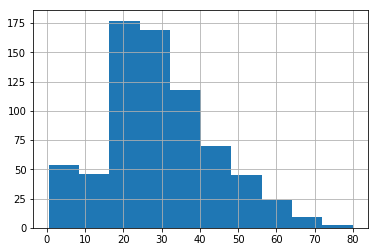

In [94]:
rawdata["Age"].hist()
plt.show()

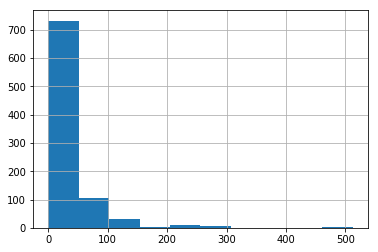

In [95]:
rawdata["Fare"].hist()
plt.show()

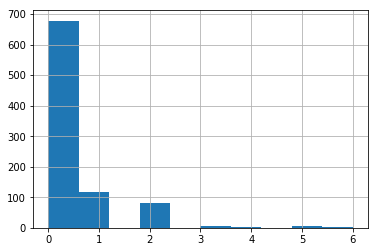

In [96]:
rawdata["Parch"].hist()
plt.show()

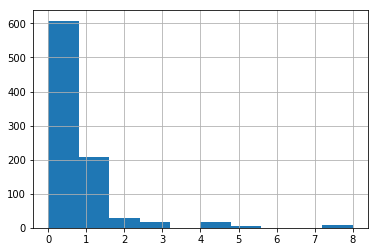

In [97]:
rawdata["SibSp"].hist()
plt.show()

In [98]:
rawdata["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [101]:
# supplementary variables

rawdata = nameLength(rawdata)


# scale relevant columns

rawdata = scaleData(rawdata,"Age")
rawdata = scaleData(rawdata,"Fare")
rawdata = scaleData(rawdata,"Name Length")

# create dummies

rawdata = dummy(rawdata,"Embarked",list(tempdat["Embarked"].unique()))
rawdata = dummy(rawdata,"Sex",list(tempdat["Sex"].unique()))
rawdata = dummy(rawdata,"Pclass",list(tempdat["Pclass"].unique()))
rawdata = isKid(rawdata,age=15)
rawdata = isAlone(rawdata)


rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name Length    891 non-null float64
male           891 non-null int64
female         891 non-null int64
3              891 non-null int64
1              891 non-null int64
2              891 non-null int64
IsKid          891 non-null int64
Alone          891 non-null int64
S              891 non-null int64
C              891 non-null int64
Q              891 non-null int64
nan            891 non-null int64
dtypes: float64(3), int64(16), object(5)
memory usage: 167.1+ KB


In [102]:
test, train = split(rawdata,test_ratio=0.4)

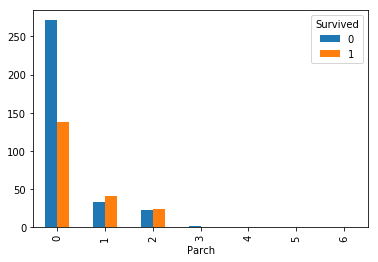

In [103]:
pd.crosstab(train["Parch"],train["Survived"]).plot(kind='bar')

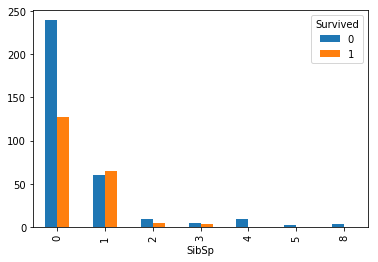

In [104]:
pd.crosstab(train["SibSp"],train["Survived"]).plot(kind='bar')

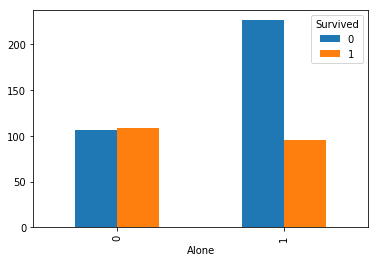

In [105]:
pd.crosstab(train["Alone"],train["Survived"]).plot(kind='bar')

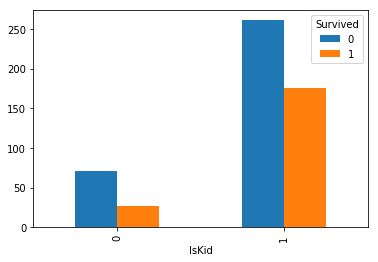

In [106]:
pd.crosstab(train["IsKid"],train["Survived"]).plot(kind='bar')

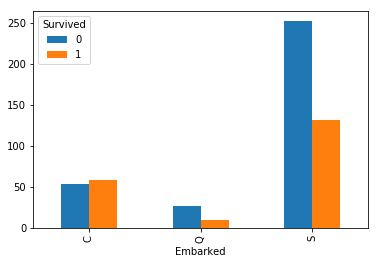

In [132]:
pd.crosstab(train["Embarked"],train["Survived"]).plot(kind='bar')

In [108]:
train.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
       'Name Length',        'male',      'female',             3,
                   1,             2,       'IsKid',       'Alone',
                 'S',           'C',           'Q',           nan],
      dtype='object')

In [118]:
y = ["Survived"]
x = list([1,2,3,"Fare","Name Length","male","female","IsKid","Alone","S","C","Q"])
print([i in train.columns for i in x])

[True, True, True, True, True, True, True, True, True, True, True, True]


In [119]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(train[x],train[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


TypeError: cannot perform reduce with flexible type

In [122]:
logreg = LogisticRegression()
logreg.fit(train[x],train[y])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
y_pred = logreg.predict(test[x])
print("Accuracy of logistic regression on test set: {:.2f}".format(logreg.score(test[x],test[y])))

Accuracy of logistic regression on test set: 0.78


In [127]:
# cross validation
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,train[x],train[y],cv=kfold,scoring=scoring)
print("10-fold cross val accuracy: ",results)

10-fold cross val accuracy:  [ 0.74074074  0.72222222  0.68518519  0.75925926  0.85185185  0.8490566
  0.8490566   0.73584906  0.71698113  0.77358491]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [128]:
results.mean()

0.76837875611460515

In [129]:
confusion_matrix = confusion_matrix(test[y],y_pred)
print(confusion_matrix)

[[182  35]
 [ 43  96]]
